
<h2><strong>ML Assignment-01</strong></h2>
<h4>Group_VRS</h4>
<h4>Members:</h4>
<table style="border-collapse: collapse; width: 100%; height: 72px;" border="1">
<tbody>
<tr style="height: 18px; background-color: blue;">
<td style="width: 50%; height: 18px; text-align: left;"><span style="color: #ffffff;"><strong>Name</strong></span></td>
<td style="width: 50%; height: 18px; text-align: left;"><span style="color: #ffffff;"><strong>BITS ID</strong></span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 50%; height: 18px; text-align: left;">Rahul Khandpur</td>
<td style="width: 50%; height: 18px; text-align: left;">2022OG04037</td>
</tr>
<tr style="height: 18px;">
<td style="width: 50%; height: 18px; text-align: left;">Vaibhav Vig</td>
<td style="width: 50%; height: 18px; text-align: left;">2022OG04038</td>
</tr>
<tr style="height: 18px;">
<td style="width: 50%; height: 18px; text-align: left;">Sumanta Kumar Patel</td>
<td style="width: 50%; height: 18px; text-align: left;">2022OG04032</td>
</tr>
</tbody>
</table>
<p><strong>Project Description: </strong></p>
<p>Using Decission Tree Model we tried to predict the housing price in Melbourn State.</p>
<p>&nbsp;</p>

In [1]:
import pandas as pd

# Path of the file to read
file_path = 'melb_data.csv'

# Fill in the line below to read the file into a variable home_data
melbourne_data = pd.read_csv(file_path)

In [2]:
#Summerizing the stastics of dataset
print(melbourne_data.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [3]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = 10517

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2023 - 2010

In [4]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
# Checking the missing values
melbourne_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)
print(melbourne_data.describe())

             Rooms         Price     Distance     Postcode     Bedroom2  \
count  6196.000000  6.196000e+03  6196.000000  6196.000000  6196.000000   
mean      2.931407  1.068828e+06     9.751097  3101.947708     2.902034   
std       0.971079  6.751564e+05     5.612065    86.421604     0.970055   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.200000e+05     5.900000  3044.000000     2.000000   
50%       3.000000  8.800000e+05     9.000000  3081.000000     3.000000   
75%       4.000000  1.325000e+06    12.400000  3147.000000     3.000000   
max       8.000000  9.000000e+06    47.400000  3977.000000     9.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  6196.000000  6196.000000   6196.000000   6196.000000  6196.000000   
mean      1.576340     1.573596    471.006940    141.568645  1964.081988   
std       0.711362     0.929947    897.449881     90.834824    38.105673   
min       1.000000  

<div>The columns that are inputted into our model (and later used to make predictions) are called "features." </div>

In [7]:
# Choosing Features
# Exploratory Data Analysis
# Corelation between independent features

corr_attribute = ['Rooms', 'Bathroom', 'Bedroom2','Landsize', 'Car','BuildingArea','YearBuilt','Distance', 'Postcode','Lattitude', 'Longtitude','Price']
corr_data = melbourne_data[corr_attribute]
corr_data.head()
corr_data.corr()

,Rooms,Bathroom,Bedroom2,Landsize,Car,BuildingArea,YearBuilt,Distance,Postcode,Lattitude,Longtitude,Price
Rooms,1.000000,0.613853,0.951793,0.098755,0.422526,0.608215,-0.068122,0.283885,0.051237,0.016049,0.088031,0.533505
Bathroom,0.613853,1.000000,0.617751,0.076295,0.340808,0.534425,0.157820,0.124530,0.109804,-0.072020,0.116103,0.503922
Bedroom2,0.951793,0.617751,1.000000,0.097172,0.425726,0.593000,-0.056343,0.290242,0.053770,0.021309,0.085895,0.514561
Landsize,0.098755,0.076295,0.097172,1.000000,0.117647,0.084825,0.026518,0.059369,0.025807,0.005610,0.032918,0.081419
Car,0.422526,0.340808,0.425726,0.117647,1.000000,0.334282,0.108714,0.273615,0.043713,0.011973,0.054699,0.261507
BuildingArea,0.608215,0.534425,0.593000,0.084825,0.334282,1.000000,0.005836,0.159603,0.078483,-0.037904,0.103613,0.530574
YearBuilt,-0.068122,0.157820,-0.056343,0.026518,0.108714,0.005836,1.000000,0.246291,0.024375,0.057108,-0.002114,-0.304633
Distance,0.283885,0.124530,0.290242,0.059369,0.273615,0.159603,0.246291,1.000000,0.405729,-0.094494,0.221861,-0.148867
Postcode,0.051237,0.109804,0.053770,0.025807,0.043713,0.078483,0.024375,0.405729,1.000000,-0.425172,0.471305,0.125539
Lattitude,0.016049,-0.072020,0.021309,0.005610,0.011973,-0.037904,0.057108,-0.094494,-0.425172,1.000000,-0.357988,-0.213574


Text(0, 0.5, 'Price')

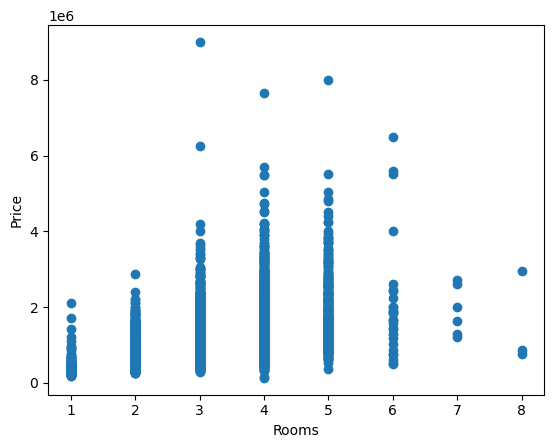

In [8]:
## visual plots for corelation (good with less number of features)
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.pairplot(melbourne_data)
plt.scatter(melbourne_data['Rooms'], melbourne_data['Price'])
plt.xlabel("Rooms")
plt.ylabel("Price")

<Axes: xlabel='Rooms', ylabel='Price'>

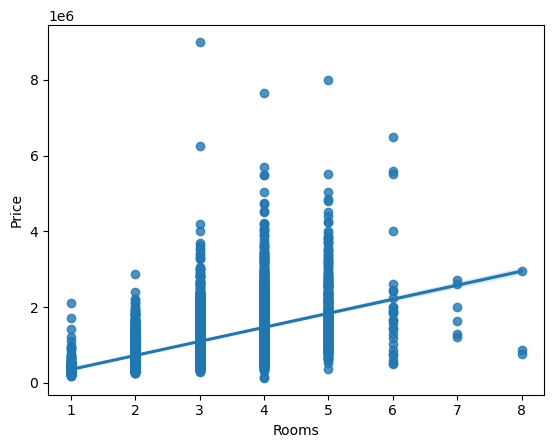

In [9]:
# Using seaborn see the regression plot
import seaborn as sns
sns.regplot(x= "Rooms", y="Price", data = melbourne_data)

In [10]:
# Dependent Feature - the prediction target is called y.
y = melbourne_data.Price
print(y)

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64


In [11]:
# Independent Features
#We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
print(X.describe())
X.head()

             Rooms     Bathroom      Landsize    Lattitude   Longtitude
count  6196.000000  6196.000000   6196.000000  6196.000000  6196.000000
mean      2.931407     1.576340    471.006940   -37.807904   144.990201
std       0.971079     0.711362    897.449881     0.075850     0.099165
min       1.000000     1.000000      0.000000   -38.164920   144.542370
25%       2.000000     1.000000    152.000000   -37.855438   144.926198
50%       3.000000     1.000000    373.000000   -37.802250   144.995800
75%       4.000000     2.000000    628.000000   -37.758200   145.052700
max       8.000000     8.000000  37000.000000   -37.457090   145.526350


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


<h4>Building the Model</h4>
<p>We are using DecisionTree from <strong>scikit-learn</strong> library.</p>
<div><strong>Fit:</strong> Capture patterns from provided data. This is the heart of modeling.</div>
<div><strong>Predict:</strong> Predicting the dependent value.</div>
<div><strong>Evaluate:</strong> Determine how accurate the model's predictions are.</div>
<div>&nbsp;</div>

In [12]:
## Train the Model
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
# Many machine learning models allow some randomness in model training. 
# Specifying a number for random_state ensures you get the same results in each run. 
# This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [13]:
# Predict with Test Data
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


<div>
<div><span style="background-color: #000080; color: #ffffff;"><strong>Model Validation</strong></span></div>
<div>Model validation to measure the quality of your model. Measuring model quality is the key to iteratively improving your models.</div>
<div>The relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.</div>
<div>There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE).
The prediction error for each house is: error=actual−predicted</div>
<div>So, if a house cost $150,000 and we predicted it would cost $100,000 the error is $50,000.</div>

<div>With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. </div>
<div>This is our measure of model quality. In plain English, it can be said as </div>

<div>On average, our predictions are off by about X.</div>

</div>

In [14]:
from sklearn.metrics import mean_absolute_error
predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

<h3 id="The-Problem-with-&quot;In-Sample&quot;-Scores"><span style="background-color: #000080; color: #ffffff;">The Problem with "In-Sample" Scores</span></h3>
<p>The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.</p>
<p>Imagine that, in the large real estate market, door color is unrelated to home price.</p>
<p>However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.</p>
<p>Since this pattern was derived from the training data, the model will appear accurate in the training data.</p>
<p>But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.</p>
<p>Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called&nbsp;<strong>validation data</strong>.</p>

In [67]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3,random_state = 0)

#Validate the shapes of Training and Validation data
print("Training and Validation data are as below")
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)
print("***************************************************************")




Training and Validation data are as below
(4337, 5) (1859, 5) (4337,) (1859,)
***************************************************************


In [68]:
# Define model - DecisionTree
melbourne_model = DecisionTreeRegressor().fit(train_X, train_y)
# Fit model
#melbourne_model.fit(train_X, train_y)

Important Matrixes for the model

In [69]:
#Cofficient of determination
print('The training r_sq is: %.2f'% melbourne_model.score(train_X,train_y))

The training r_sq is: 1.00


Predictions on Training Data

In [83]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import numpy as np


## Prediction on Trainig dataset
train_y_predict = melbourne_model.predict(train_X)
print("TRAINING DATA PREDICTIONS \n*********************************")
## The r_sq
print('The r2_sq is: ', r2_score(train_y,train_y_predict))

## Mean absolute Error on training data
print('The MAE is: ', mean_absolute_error(train_y, train_y_predict) )

## Mean Square Error on training data
print('The MSE is: ', mean_squared_error(train_y, train_y_predict))

## Root Mean square Error
print('The RMSE is: ', np.sqrt(mean_squared_error(train_y,train_y_predict)))

## The Explained Variance Score
print('The EVS is: ', explained_variance_score(train_y, train_y_predict))

TRAINING DATA PREDICTIONS 
*********************************
The r2_sq is:  0.9997742552179427
The MAE is:  773.5762047498271
The MSE is:  94204941.9721774
The RMSE is:  9705.923035558102
The EVS is:  0.9997742552179427


Predictions on Validation data

In [82]:
#Cofficient of determination
print('The validation r_sq is: %.2f'% melbourne_model.score(val_X,val_y))

## Predictions on Validation data
val_y_predict = melbourne_model.predict(val_X)
print("VALIDATION DATA PREDICTIONS \n*********************************")
## The r_sq
print('The r2_sq is: ', r2_score(val_y,val_y_predict))

## Mean absolute Error on training data
print('The MAE is: ', mean_absolute_error(val_y, val_y_predict))

## Mean Square Error on training data
print('The MSE is: ', mean_squared_error(val_y, val_y_predict))

## Root Mean square Error
print('The RMSE is: ', np.sqrt(mean_squared_error(val_y,val_y_predict)))

## The Explained Variance Score
print('The EVS is: ', explained_variance_score(val_y, val_y_predict))

The validation r_sq is: 0.51
VALIDATION DATA PREDICTIONS 
*********************************
The r2_sq is:  0.5077178189707199
The MAE is:  283266.25407925405
The MSE is:  268185546530.24966
The RMSE is:  517866.34041058284
The EVS is:  0.5082196014597424


In [76]:
# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print("Average Price of house is: " + str(val_predictions.mean()))
print("Mean Absolute Error: ", mean_absolute_error(val_y, val_predictions))

Average Price of house is: 1074396.2078178234
Mean Absolute Error:  283266.25407925405


<p><span style="background-color: #ff0000; color: #ffffff;"><strong>Remarks</strong></span></p>
<p>Our mean absolute error for the in-sample data was about 1100 dollars. Out-of-sample it is more than 270,000 dollars.</p>
<p>This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.0 million dollars. So the error in new data is about a quarter of the average home value.</p>
<p>There are many ways to improve this model, such as experimenting to find better features or different model types.</p>

<h3 class="sc-csCMJt sc-fbJfA sc-jcEumN gttkKI hmVOek bbAnao">Underfitting and Overfitting</h3>
<p><strong><span style="background-color: #000080; color: #ffffff;">Overfitting</span>: - </strong>When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).</p>
<p>This is a phenomenon called&nbsp;<strong>overfitting</strong>, where a model matches the training data almost perfectly, but does poorly in validation and other new data.</p>
<p><strong><span style="background-color: #000080; color: #ffffff;">Underfitting</span>: - </strong>At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called&nbsp;<strong>underfitting</strong>.</p>
<p>Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.</p>
<p><img src="https://storage.googleapis.com/kaggle-media/learn/images/AXSEOfI.png" alt="underfitting_overfitting" width="434" height="303" /></p>

<p><span style="background-color: #000080; color: #ffffff;"><strong>Solution</strong></span></p>
<p>There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the&nbsp;<em>max_leaf_nodes</em>&nbsp;argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.</p>
<p>We can use a utility function to help compare MAE scores from different values for&nbsp;<em>max_leaf_nodes</em>:</p>

In [ ]:
## Creating a function to get the MAE (Mean Absolute Error) for different values of max_leaf_node.
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [5, 50, 100, 250, 500,1000,5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 100  		 Mean Absolute Error:  269191
Max leaf nodes: 250  		 Mean Absolute Error:  269945
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 1000  		 Mean Absolute Error:  262044
Max leaf nodes: 5000  		 Mean Absolute Error:  271320


Conclusion: - Prediction with max leaf node, 500 is giving good result

In [86]:
best_tree_size = 500

final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model
final_model.fit(X, y)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(final_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1078446.42857143 1246050.         1660600.         1410451.61290323
 1366469.375     ]


## New Data Prediction
Model is - final_model

In [98]:
melbourne_data[melbourne_features].iloc[0].shape

(5,)

In [110]:
test1 = melbourne_data[melbourne_features].iloc[1].values.reshape(1,-1)
test1

array([[  3.    ,   2.    , 134.    , -37.8093, 144.9944]])

In [111]:
final_model.predict(test1)

c:\Users\suman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1246050.])

In [1]:
import pickle

In [ ]:
pickle.dump(final_model,open('dtModel.pkl','wb'))

For Practice Purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor


melb_data_X = melbourne_data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]
melb_data_y = melbourne_data['Price']

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(melb_data_X, melb_data_y)

DecisionTreeRegressor(max_depth=2)

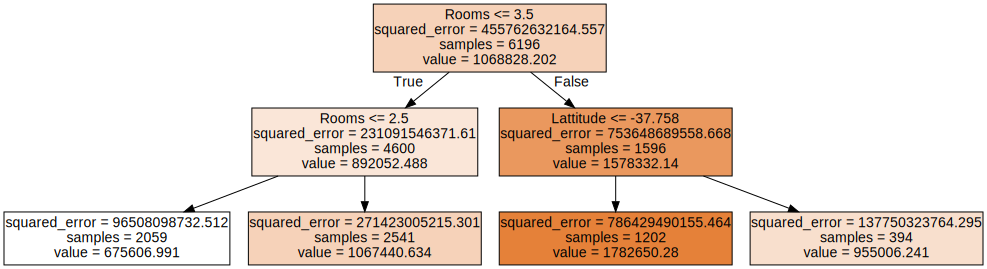

In [ ]:
# Visualize the trained Decision Tree by export_graphviz() method
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


labels = melb_data_X.columns

graph = Source(tree.export_graphviz(tree_reg ,feature_names = labels, max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))